<hr style="border:1px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> FUNDAMENTOS MATEMATICOS PARA INTELIGENCIA ARTIFICIAL</h1></center> 
<center><h1 style="color:#173F8A;"> IMT 3850, 2022 </h1></center>
<hr style="border:1px solid #FEC60D"> </hr>
<center><h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br></h3></center>
<h3 style="color:#03122E;text-align:right;"> Magister en Inteligencia Artificial - MIA <br> Instituto de Ingenieria Matematica y Computacional - IMC<br>  Pontificia Universidad Catolica de Chile<br>   </h3>




<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Optimizacion - clase 9</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

In [1]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l
import matplotlib.pyplot as plt

## Dataset

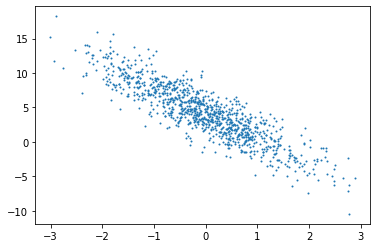

In [2]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);


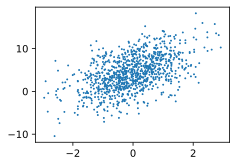

In [3]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (0)].detach().numpy(), labels.detach().numpy(), 1);

In [4]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [5]:
next(iter(data_iter))

[tensor([[ 0.0115, -1.3204],
         [-0.0066, -1.1924],
         [ 0.9768, -1.6252],
         [-0.2631, -0.3337],
         [-0.1184,  0.2652],
         [ 2.0823,  0.7758],
         [-0.0154, -1.1835],
         [ 1.5260, -0.5619],
         [-0.1476, -2.2651],
         [ 0.3095,  0.0189]]),
 tensor([[ 8.7038],
         [ 8.2396],
         [11.6706],
         [ 4.7897],
         [ 3.0593],
         [ 5.7198],
         [ 8.2020],
         [ 9.1723],
         [11.6247],
         [ 4.7405]])]

## Model - initialize

In [6]:
# `nn` is an abbreviation for neural networks
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

In [7]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

## Loss function or learning function

In [8]:
loss = nn.MSELoss()

## Optimization algorithm

In [9]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

## Training

In [10]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000257
epoch 2, loss 0.000102
epoch 3, loss 0.000102


tensor([6.1417], grad_fn=<SelectBackward0>)
tensor([6.1540])


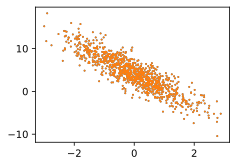

In [11]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);
yreg = net(features)
d2l.plt.scatter(features[:, (1)].detach().numpy(), yreg.detach().numpy(), 1);
print(yreg[(10)])
print(labels[(10)])

## Errors

error in estimating w: tensor([-0.0002, -0.0003])
error in estimating b: tensor([0.0003])


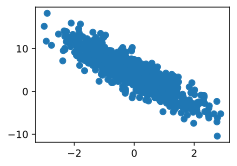

In [12]:
w = net[0].weight.data.detach().numpy()

print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)
yreg = w[0,0]*features[:, (0)].detach().numpy() +w[0,1]*features[:, (1)].detach().numpy() + b.numpy()
plt.plot(features[:, (1)].detach().numpy() ,yreg,'o')

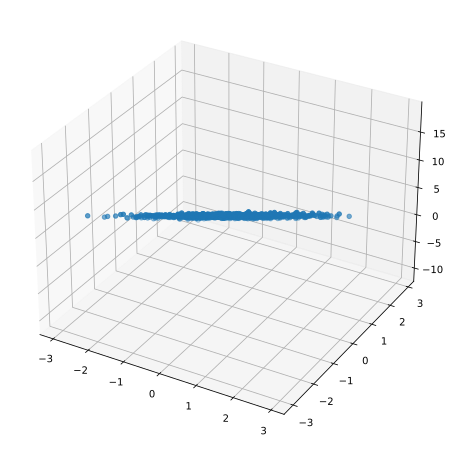

In [13]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
x1 = features[:, (0)].detach().numpy()
x2 = features[:, (1)].detach().numpy()
ax.scatter(x1, x2, yreg, marker='o')
plt.show()